<a href="https://colab.research.google.com/github/julmoram/aluraDC/blob/main/TelecomX_LATAM_correccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Disclaimer

##Este repositorio originalmente corresponde a https://github.com/Mathiiius

###El que yo hice estaba mal asi que utilice este para corregir

#📌 Extracción

In [14]:
#Cargar importaciones
import pandas as pd
import json
import requests

In [15]:
#Abrir el google drive para traer el archivo de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#Cargar el URl
url = '/content/drive/MyDrive/TelecomX_Data.json'

In [19]:
# Normalizar los datos anidados
df = pd.json_normalize(data)

In [20]:
# Mostrar las primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [21]:
# Mostrar nombres de columnas y tipos de datos
print("Columnas del dataset:")
print(df.columns)

print("\nTipos de datos:")
print(df.dtypes)


Columnas del dataset:
Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Tipos de datos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity    

In [22]:
# Valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Revisar filas duplicadas
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Mostrar categorías únicas de columnas categóricas (para ver si hay inconsistencias)
categorical_cols = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
                    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in categorical_cols:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique())


Valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Número de filas duplicadas: 0

Valores únicos en Churn:
['No' 'Yes' '']

Valores únicos en customer.gender:
['Female' 'Male']

Valores únicos en customer.Partner:
['Yes' 'No']

Valores únicos en customer.Dependents:
['Yes' 'No']

Valores únicos en phone.PhoneService:
['Yes' 'No']

Valores únicos en phone.Mu

In [23]:
import numpy as np

# Reemplazar valores 'No internet service' y 'No phone service' por 'No'
cols_con_internet = ['internet.OnlineSecurity', 'internet.OnlineBackup',
                     'internet.DeviceProtection', 'internet.TechSupport',
                     'internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_con_internet:
    df[col] = df[col].replace('No internet service', 'No')

df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service', 'No')

# Convertir a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Eliminar filas con valores nulos en Churn y Charges.Total (limpieza total)
df = df.dropna(subset=['Churn', 'account.Charges.Total'])

# Verificar limpieza final
print("Valores nulos restantes:")
print(df.isnull().sum())


Valores nulos restantes:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [24]:
# Crear columna Cuentas_Diarias dividiendo la facturación mensual por 30
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
df[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [25]:
# Convertir "Yes" / "No" en 1 / 0 para variables binarias
bin_cols = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
            'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup',
            'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
            'internet.StreamingMovies', 'account.PaperlessBilling']

for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convertir género a binario (1 = Hombre, 0 = Mujer)
df['customer.gender'] = df['customer.gender'].map({'Male': 1, 'Female': 0})

# Renombrar columnas a español
df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Mayor_65',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Factura_Digital',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total'
}, inplace=True)

# Verificamos cómo quedó el dataframe
df.head()


,ID_Cliente,Evasion,Genero,Mayor_65,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

Se calcularon métricas estadísticas básicas como media, mediana y desviación estándar. Esto permite conocer el perfil promedio del cliente, así como la variabilidad en los gastos y duración del contrato.



In [26]:
# Análisis descriptivo de variables numéricas
df[['Cargo_Mensual', 'Cargo_Total', 'Meses_Contrato', 'Cuentas_Diarias']].describe()

,Cargo_Mensual,Cargo_Total,Meses_Contrato,Cuentas_Diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,64.755423,2280.634213,32.395535,2.158514
std,30.125739,2268.632997,24.558067,1.004191
min,18.250000,18.800000,1.000000,0.608333
25%,35.450000,400.225000,9.000000,1.181667
50%,70.300000,1391.000000,29.000000,2.343333
75%,89.900000,3785.300000,55.000000,2.996667
max,118.750000,8684.800000,72.000000,3.958333


In [28]:
import warnings

warnings.filterwarnings('ignore')

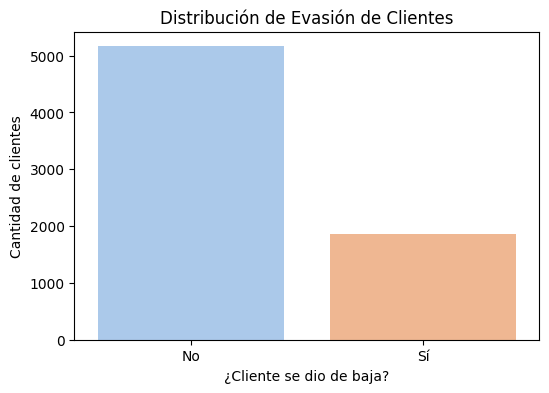

Porcentaje de evasión:
Evasion
0.0    73.421502
1.0    26.578498
Name: proportion, dtype: float64


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo y gráfico de evasión
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Evasion', palette='pastel')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()

# Porcentaje
porcentaje = df['Evasion'].value_counts(normalize=True) * 100
print("Porcentaje de evasión:")
print(porcentaje)


La distribución de la variable evasión indica que aproximadamente el 26.6% de los clientes decidieron cancelar su servicio, mientras que el 73.4% permanecen activos. Esto evidencia que más de una cuarta parte de la base de clientes representa un riesgo de pérdida para la empresa, por lo que es crucial entender los factores que motivan esta evasión para diseñar estrategias efectivas de retención.

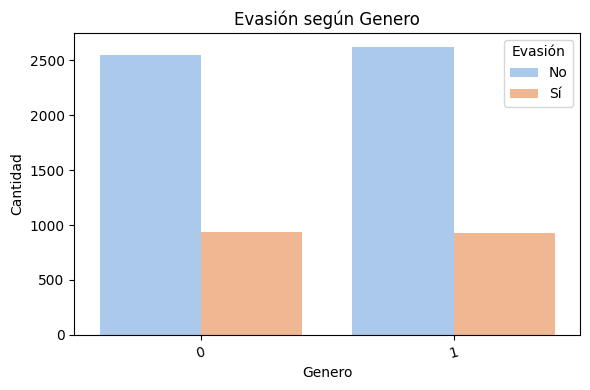

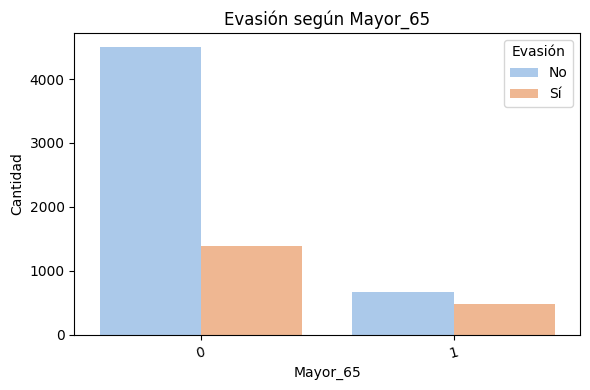

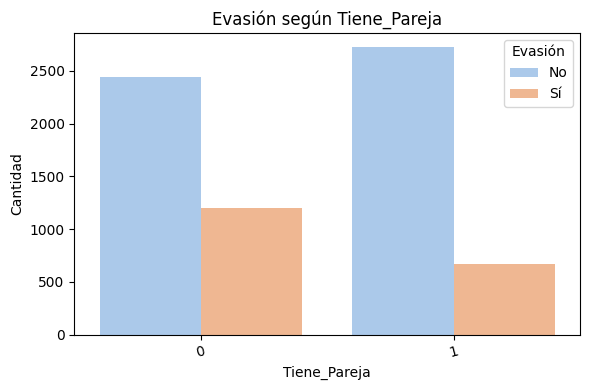

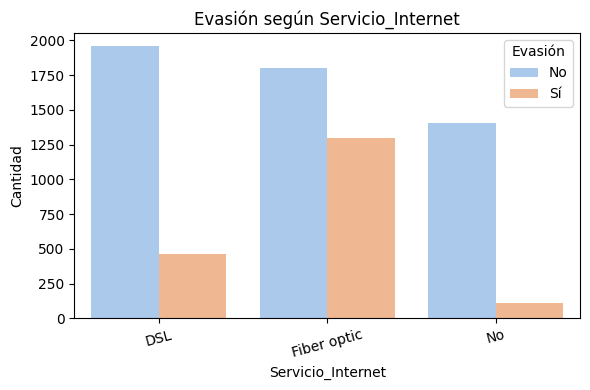

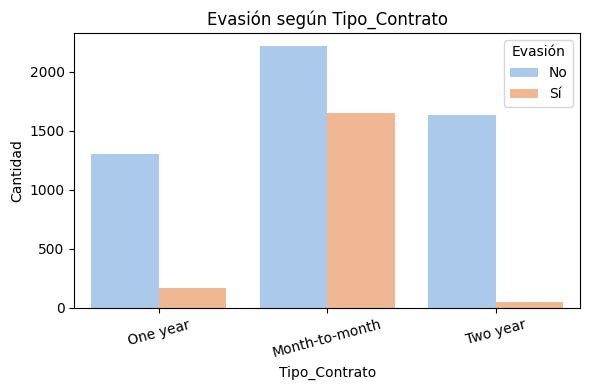

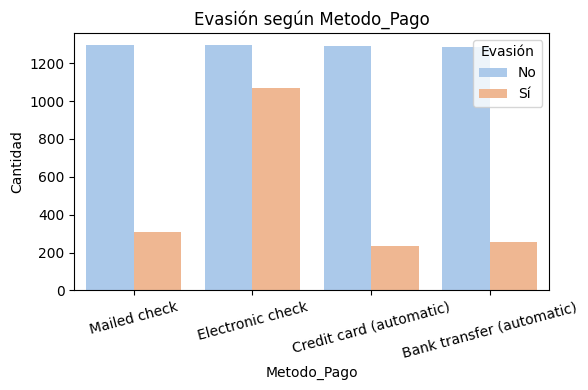

In [30]:
# Variables categóricas clave
cat_vars = ['Genero', 'Mayor_65', 'Tiene_Pareja', 'Servicio_Internet',
            'Tipo_Contrato', 'Metodo_Pago']

for var in cat_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=var, hue='Evasion', palette='pastel')
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.legend(title='Evasión', labels=['No', 'Sí'])
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()


Se observan diferencias significativas en la evasión según el tipo de contrato y método de pago. Por ejemplo, los clientes con contrato mensual presentan una mayor tasa de cancelación.



/tmp/ipython-input-12-1261068211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasion', y=var, palette='pastel')


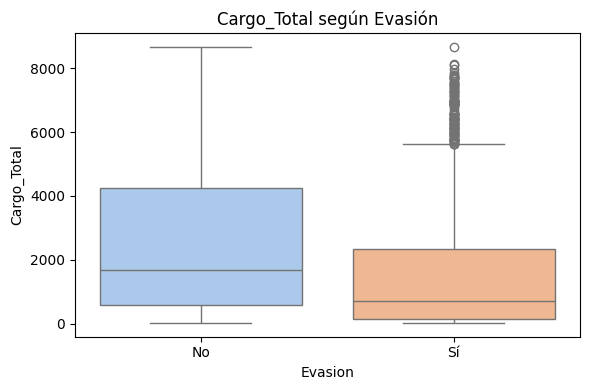

/tmp/ipython-input-12-1261068211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasion', y=var, palette='pastel')


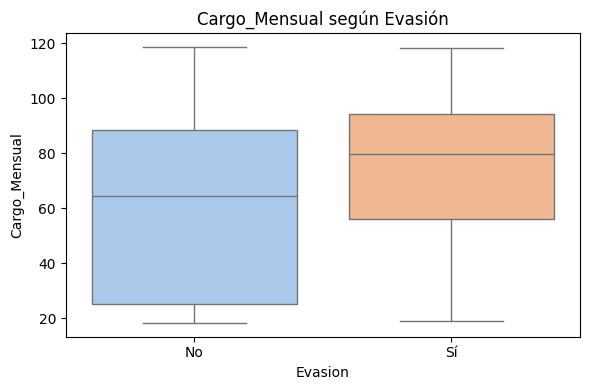

/tmp/ipython-input-12-1261068211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Evasion', y=var, palette='pastel')


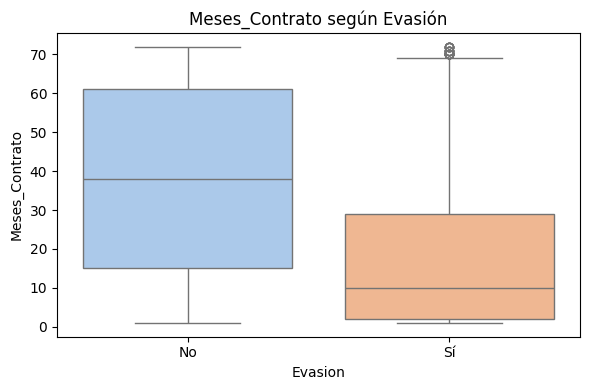

In [12]:
num_vars = ['Cargo_Total', 'Cargo_Mensual', 'Meses_Contrato']

for var in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Evasion', y=var, palette='pastel')
    plt.title(f'{var} según Evasión')
    plt.xticks([0,1], ['No', 'Sí'])
    plt.tight_layout()
    plt.show()


Los clientes con menor tiempo de contrato y menor gasto total tienden a tener una mayor tasa de evasión, lo que sugiere que clientes más recientes o poco comprometidos abandonan más fácilmente.



In [13]:
df.to_csv("datos_tratados.csv", index=False)

#📄Informe final

# 📄 Introducción

En este análisis para Telecom X, se estudió la evasión de clientes (churn), buscando patrones que expliquen por qué los clientes abandonan el servicio.

## 🧹 Limpieza y Tratamiento

Se importaron los datos desde un archivo JSON. Se eliminaron valores nulos, se unificaron categorías como "No internet service", se creó una variable Cuentas_Diarias y se tradujeron las columnas a español para mayor claridad.

## 📊 Análisis Exploratorio

Se realizaron análisis estadísticos y visualizaciones categóricas y numéricas, comparando variables con la evasión. Se detectaron diferencias significativas por tipo de contrato, forma de pago y gasto total.

## 💡 Conclusiones e Insights

* La evasión se concentra en clientes con contrato mensual.

* Clientes que pagan con débito automático o tienen contratos largos abandonan menos.

* El gasto total y la permanencia están relacionados con la retención.

## 📌 Recomendaciones

* Promover contratos de 1 o 2 años con beneficios.

* Incentivar métodos de pago automáticos con descuentos.

* Focalizar campañas de fidelización en clientes nuevos o con bajo gasto total.